In [1]:
import numpy as np
import pandas as pd

In [2]:
%pwd

'C:\\Users\\chamin\\Documents\\NLP'

In [3]:
df = pd.read_csv('C:\\Users\\chamin\\Documents\\NLP\\UPDATED_NLP_COURSE\\TextFiles\\smsspamcollection.tsv', sep='\t')

In [5]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [6]:
# check for missing data
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [7]:
len(df)

5572

In [9]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [11]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

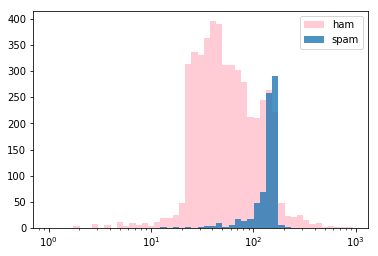

In [16]:
import matplotlib.pyplot as plt

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'], bins=bins, alpha=0.8, color="pink")
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [22]:
df['message'][df['label']=='ham'][:1]

0    Go until jurong point, crazy.. Available only ...
Name: message, dtype: object

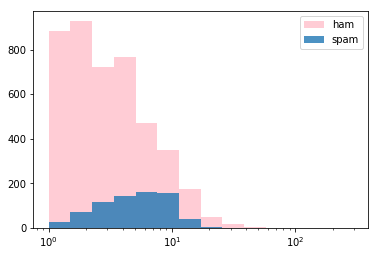

In [26]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))

plt.hist(df[df['label']=='ham']['punct'], bins=bins, alpha=0.8, color="pink")
plt.hist(df[df['label']=='spam']['punct'], bins=bins, alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

In [37]:
X = df[['length', 'punct']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

In [30]:
X_train.shape

(3900, 2)

In [31]:
 from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
from sklearn import metrics

In [40]:
y_pred = model.predict(X_test)

In [41]:
pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred),
    index=['ham', 'spam'],
    columns=['ham', 'spam']
)

,ham,spam
ham,1421,30
spam,218,3


In [42]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.87      0.98      0.92      1451
        spam       0.09      0.01      0.02       221

   micro avg       0.85      0.85      0.85      1672
   macro avg       0.48      0.50      0.47      1672
weighted avg       0.76      0.85      0.80      1672



In [43]:
metrics.accuracy_score(y_test, y_pred)

0.8516746411483254

In [44]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [45]:
y_pred = nb_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.93      1451
        spam       0.33      0.02      0.03       221

   micro avg       0.87      0.87      0.87      1672
   macro avg       0.60      0.51      0.48      1672
weighted avg       0.80      0.87      0.81      1672



In [46]:
metrics.accuracy_score(y_test, y_pred)

0.8654306220095693

In [48]:
from sklearn.svm import SVC
svc_model = SVC(gamma='auto')

svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.95      0.94      1451
        spam       0.61      0.52      0.57       221

   micro avg       0.89      0.89      0.89      1672
   macro avg       0.77      0.74      0.75      1672
weighted avg       0.89      0.89      0.89      1672



In [49]:
metrics.accuracy_score(y_test, y_pred)

0.8935406698564593

# Count Vectorization

In [79]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
count_vect = CountVectorizer()

In [74]:
X = df['message']
y = df['label']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)

In [76]:
# Transform the original text message to vector
X_train_counts = count_vect.fit_transform(X_train)

In [78]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [80]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

In [81]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [83]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([
    ('tfidf', vectorizer),
    ('clf', LinearSVC())
])

In [84]:
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [86]:
y_pred = text_clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1589
        spam       0.97      0.90      0.94       250

   micro avg       0.98      0.98      0.98      1839
   macro avg       0.98      0.95      0.96      1839
weighted avg       0.98      0.98      0.98      1839



In [87]:
text_clf.predict(['Hi how are you doing today?'])

array(['ham'], dtype=object)

In [88]:
text_clf.predict(['Congratulation you have been selected as a winner. TEXT WON to 4255 free entry to contest'])

array(['spam'], dtype=object)

In [90]:
movie = pd.read_csv('C:\\Users\\chamin\\Documents\\NLP\\UPDATED_NLP_COURSE\\TextFiles\\moviereviews.tsv', sep='\t')

In [91]:
movie.isnull().sum()

label      0
review    35
dtype: int64

In [92]:
movie.dropna(inplace=True)

In [93]:
movie.isnull().sum()

label     0
review    0
dtype: int64

In [95]:
# drop empty strings data
blanks = []

for i, label, review in movie.itertuples():
    if review.isspace():
        blanks.append(i)

In [96]:
blanks

[57,
 71,
 147,
 151,
 283,
 307,
 313,
 323,
 343,
 351,
 427,
 501,
 633,
 675,
 815,
 851,
 977,
 1079,
 1299,
 1455,
 1493,
 1525,
 1531,
 1763,
 1851,
 1905,
 1993]

In [97]:
movie.drop(blanks, inplace=True)

In [99]:
X = movie['review']
y = movie['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)

In [101]:
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [102]:
y_pred = text_clf.predict(X_test)

In [103]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.83      0.85      0.84       313
         pos       0.85      0.84      0.84       327

   micro avg       0.84      0.84      0.84       640
   macro avg       0.84      0.84      0.84       640
weighted avg       0.84      0.84      0.84       640



In [107]:
print(metrics.accuracy_score(y_test, y_pred))

0.8421875
